<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


Out of Bag Score = 0.9571
[[135   3]
 [  8  64]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       138
           1       0.96      0.89      0.92        72

    accuracy                           0.95       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


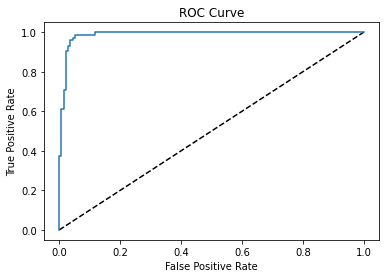

0.9879227053140096

In [1]:
import pandas as pd

df = pd.read_csv("/content/BreastCancer.csv")

dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Class_Benign', axis=1)

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

X = dum_df.iloc[:,1:10]
y = dum_df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

# Default: Tree Classifier
model_rf = BaggingClassifier(random_state=1211,oob_score=True,
                             max_features=X.shape[1],
                             n_estimators=50)

#OR for any other model bagging
from sklearn.linear_model import LogisticRegression

model_rf = BaggingClassifier(base_estimator = LogisticRegression() ,
                             random_state=1211,oob_score=True,
                             max_features=X.shape[1])
                             
model_rf.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred = model_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)


In [ ]:
####### Regressor##############

In [2]:
import pandas as pd
df = pd.read_csv("/content/Housing (2).csv")
dum_df = pd.get_dummies(df.iloc[:,1:11], drop_first=True)

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingRegressor

X = dum_df
y = df.iloc[:,1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018)

# Default: Tree Regressor
model_rf = BaggingRegressor(random_state=1211,oob_score=True,
                            max_features = X.shape[1])

# any other model bagging regressor
from sklearn.linear_model import LinearRegression
model_rf = BaggingRegressor(base_estimator = LinearRegression(),
                            random_state=1211,oob_score=True,
                            max_features = X.shape[1])

model_rf.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_rf.oob_score_))

y_pred = model_rf.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


Out of Bag Score = 0.9185
3.782838167163236e-27
8.31854910158166e-15
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
